In [309]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
import seaborn as sb


In [310]:
data=pd.read_csv('D:\Python\Datasets\heart.csv')

In [311]:
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [312]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [313]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

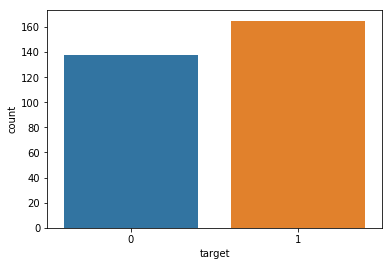

In [314]:
sb.countplot(data['target'],label='count')

(array([ 1., 11., 33., 38., 37., 60., 63., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <a list of 10 Patch objects>)

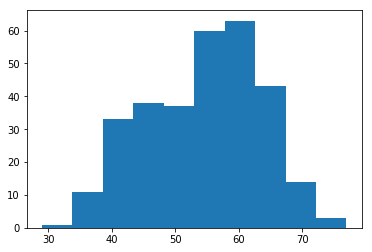

In [315]:

plt.hist(data['age'])

In [316]:
print(min(data['age']))

print(max(data['age']))

29
77


In [317]:
data['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [318]:
sum=0
for (i,d) in enumerate(data['sex']):
    if d==1:
        sum=sum+data.age[i]
        
sum/207
    

53.75845410628019

In [319]:
sum=0
for (i,d) in enumerate(data['sex']):
    if d==0:
        sum=sum+data.age[i]
        
sum/207

25.82125603864734

In [320]:
data['age_group']=0
data.loc[(data.age>25)&(data.age<=35),'age_group']=1
data.loc[(data.age>35)&(data.age<=50),'age_group']=2
data.loc[(data.age>50)&(data.age<=60),'age_group']=3
data.loc[(data.age>60)&(data.age<=70),'age_group']=4
data.loc[(data.age>70),'age_group']=4

In [321]:
data['age_group']

0      4
1      2
2      2
3      3
4      3
5      3
6      3
7      2
8      3
9      3
10     3
11     2
12     2
13     4
14     3
15     2
16     3
17     4
18     2
19     4
20     3
21     2
22     2
23     4
24     2
25     4
26     3
27     3
28     4
29     3
      ..
273    3
274    2
275    3
276    3
277    3
278    3
279    4
280    2
281    3
282    3
283    2
284    4
285    2
286    3
287    3
288    3
289    3
290    4
291    3
292    3
293    4
294    2
295    4
296    4
297    3
298    3
299    2
300    4
301    3
302    3
Name: age_group, Length: 303, dtype: int64

(array([10., 42., 67., 74., 57., 27., 13.,  8.,  3.,  2.]),
 array([ 94. , 104.6, 115.2, 125.8, 136.4, 147. , 157.6, 168.2, 178.8,
        189.4, 200. ]),
 <a list of 10 Patch objects>)

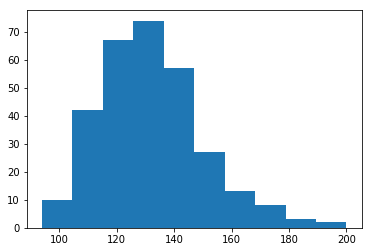

In [322]:
plt.hist(data['trestbps'])

In [323]:
print(min(data['trestbps']))
print(max(data['trestbps']))

94
200


In [324]:
data['trestbps_group']=0
data.loc[(data.trestbps>90)&(data.trestbps<=120),'trestbps_group']=1
data.loc[(data.trestbps>120)&(data.trestbps<=145),'trestbps_group']=2
data.loc[(data.trestbps>145)&(data.trestbps<=160),'trestbps_group']=3
data.loc[(data.trestbps>160),'trestbps_group']=4

In [325]:
data['trestbps_group']

0      2
1      2
2      2
3      1
4      1
5      2
6      2
7      1
8      4
9      3
10     2
11     2
12     2
13     1
14     3
15     1
16     1
17     3
18     3
19     2
20     2
21     2
22     2
23     3
24     2
25     3
26     3
27     1
28     2
29     2
      ..
273    1
274    1
275    2
276    3
277    2
278    2
279    2
280    2
281    2
282    2
283    3
284    2
285    2
286    2
287    3
288    1
289    2
290    3
291    1
292    4
293    3
294    1
295    2
296    2
297    4
298    2
299    1
300    2
301    2
302    2
Name: trestbps_group, Length: 303, dtype: int64

In [326]:
corr_matrix=data.corr()
corr_matrix['target'].sort_values(ascending=False)

target            1.000000
cp                0.433798
thalach           0.421741
slope             0.345877
restecg           0.137230
fbs              -0.028046
chol             -0.085239
trestbps_group   -0.143036
trestbps         -0.144931
age_group        -0.194798
age              -0.225439
sex              -0.280937
thal             -0.344029
ca               -0.391724
oldpeak          -0.430696
exang            -0.436757
Name: target, dtype: float64

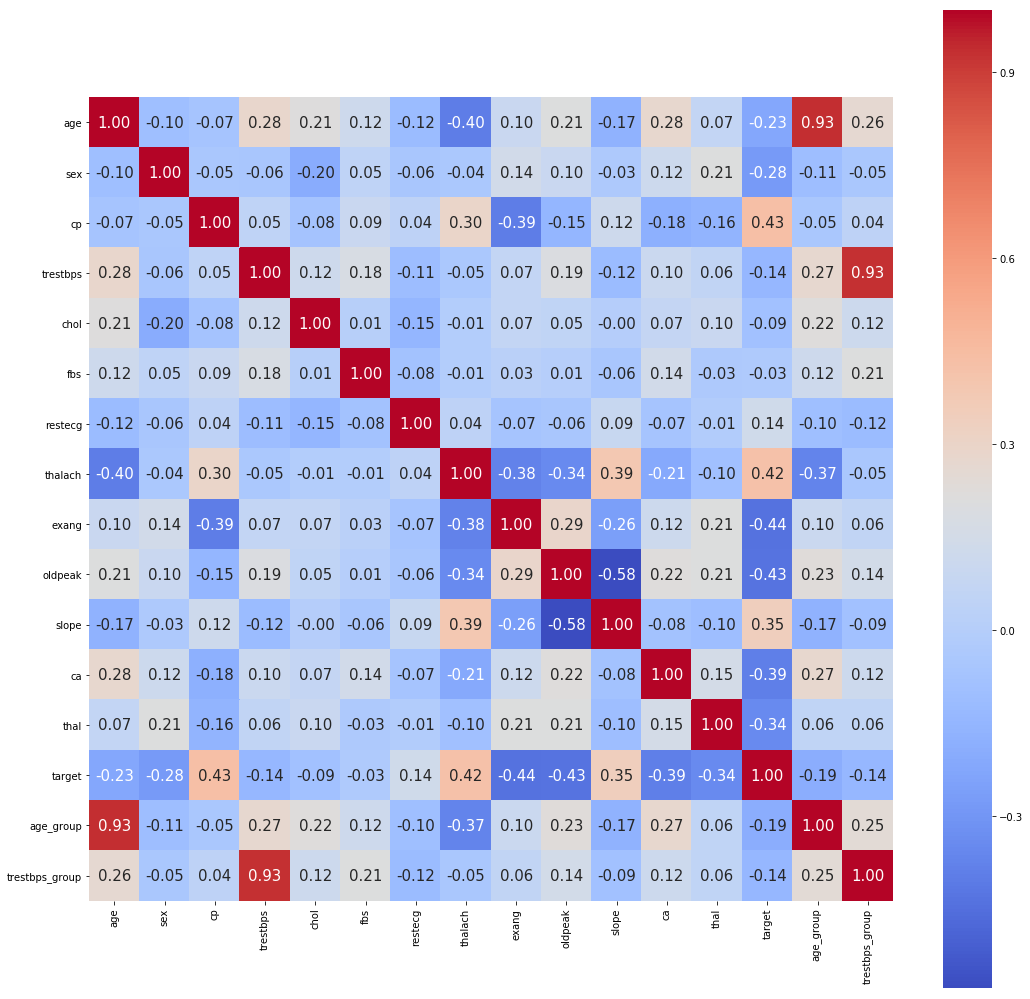

In [327]:
corr = data.corr()
plt.figure(figsize=(18,18))
sb.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= list(data), yticklabels= list(data),
           cmap= 'coolwarm')

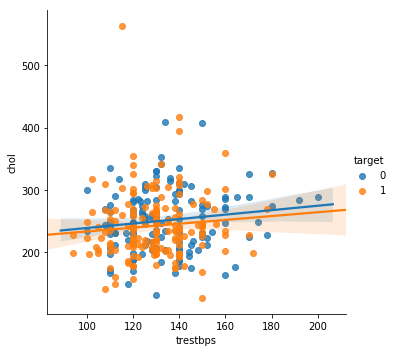

In [328]:
sb.lmplot(x="trestbps", y="chol", hue="target", data=data);

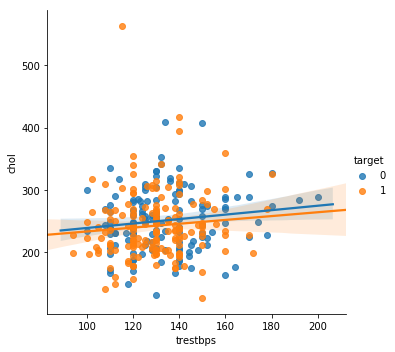

In [329]:
sb.lmplot(x="trestbps", y="chol", hue="target", data=data);

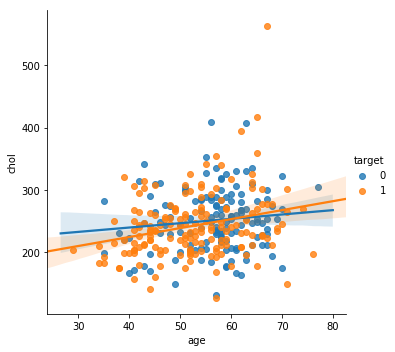

In [330]:
sb.lmplot(x="age", y="chol", hue="target", data=data);

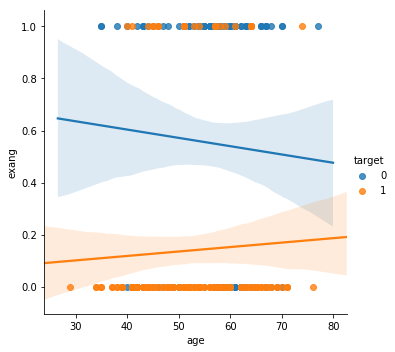

In [331]:
sb.lmplot(x="age", y="exang", hue="target", data=data);

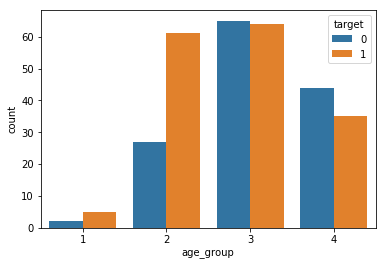

In [332]:
sb.countplot(x="age_group", hue="target", data=data)

(array([ 12.,  73., 106.,  69.,  35.,   3.,   4.,   0.,   0.,   1.]),
 array([126. , 169.8, 213.6, 257.4, 301.2, 345. , 388.8, 432.6, 476.4,
        520.2, 564. ]),
 <a list of 10 Patch objects>)

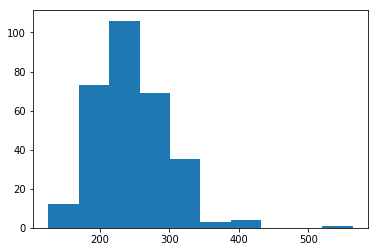

In [333]:
plt.hist(data['chol'])

In [334]:
print(min(data['chol']))
print(max(data['chol']))

126
564


In [335]:
data['chol_group']=0
data.loc[(data.chol>120)&(data.chol<=200),'chol_group']=1
data.loc[(data.chol>200)&(data.chol<=239),'chol_group']=2
data.loc[(data.chol>239),'chol_group']=3



In [336]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,trestbps_group,chol_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,4,2,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,2,2,3
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,2,2,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,3,1,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,3,1,3


71
202


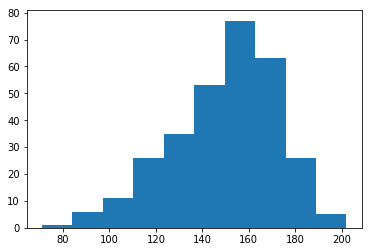

In [337]:
plt.hist(data['thalach'])
print(min(data['thalach']))
print(max(data['thalach']))

In [338]:
data['thalach_group']=0
data.loc[(data.thalach>=60)&(data.thalach<=100),'thalach_group']=0
data.loc[(data.thalach>100)&(data.thalach<=150),'thalach_group']=1
data.loc[(data.thalach>150),'thalach_group']=2


In [339]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,trestbps_group,chol_group,thalach_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,4,2,2,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,2,2,3,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,2,2,2,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,3,1,2,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,3,1,3,2


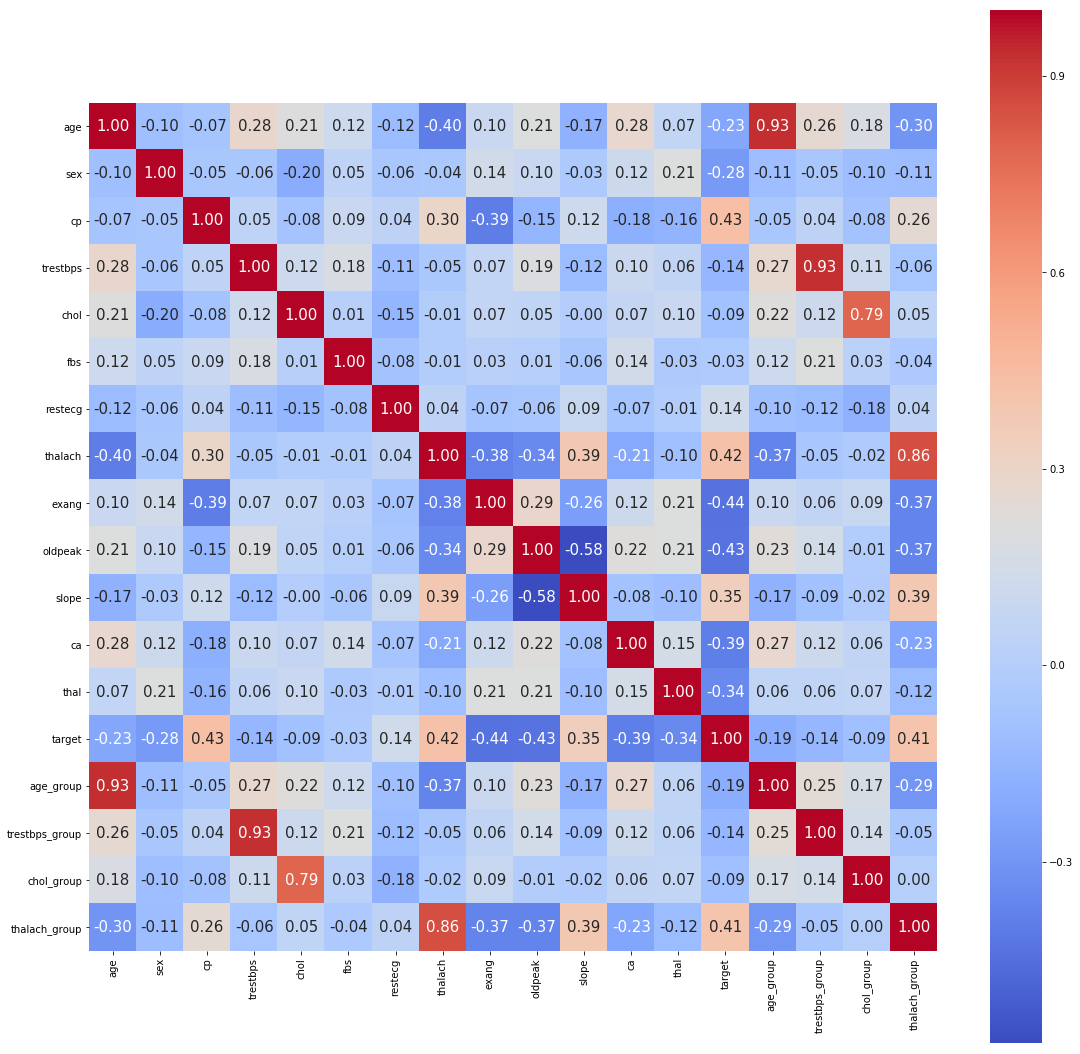

In [340]:
corr = data.corr()
plt.figure(figsize=(19,19))
sb.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= list(data), yticklabels= list(data),
           cmap= 'coolwarm')

In [341]:
data=data.drop(['age','trestbps','thalach','chol'],axis=1)

In [342]:
data.head()

,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,target,age_group,trestbps_group,chol_group,thalach_group
0,1,3,1,0,0,2.3,0,0,1,1,4,2,2,1
1,1,2,0,1,0,3.5,0,0,2,1,2,2,3,2
2,0,1,0,0,0,1.4,2,0,2,1,2,2,2,2
3,1,1,0,1,0,0.8,2,0,2,1,3,1,2,2
4,0,0,0,1,1,0.6,2,0,2,1,3,1,3,2


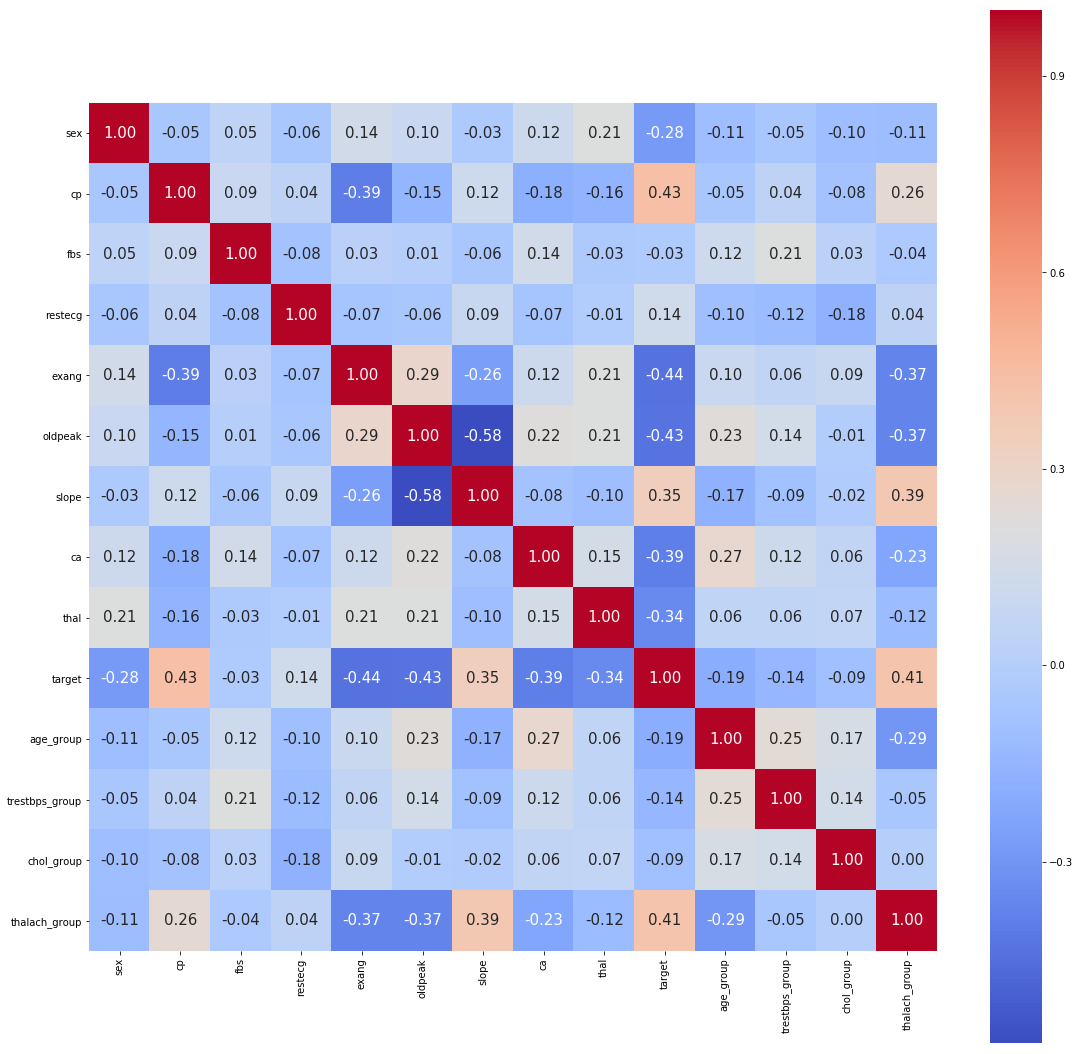

In [343]:
corr = data.corr()
plt.figure(figsize=(19,19))
sb.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= list(data), yticklabels= list(data),
           cmap= 'coolwarm')

In [368]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestRegressor
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle

In [369]:
data=shuffle(data)

In [370]:
data.head()

,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,target,age_group,trestbps_group,chol_group,thalach_group
103,1,2,1,1,0,0.8,0,0,3,1,2,1,3,2
82,0,2,0,1,0,0.0,2,1,2,1,3,1,3,2
272,1,0,0,1,0,1.0,1,0,2,0,4,1,2,0
133,1,1,0,1,0,0.0,2,0,2,1,2,1,2,2
70,1,2,0,0,0,0.4,1,0,3,1,3,1,3,1


In [371]:
y=data['target']
x = data.drop("target", axis=1)


In [372]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [373]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)



Prediction= regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))

Linear Regression R squared": 0.2983


In [374]:
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

Random Forest R squared": 0.3881


c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [375]:
model = GradientBoostingRegressor()

model.fit(X_train, y_train)



print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))

Gradient Boosting R squared": 0.3608


In [432]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras.layers import Dense
model = tf.keras.Sequential()

In [433]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(13, activation='relu',input_dim=13))
#model.add(tf.keras.layers.Dropout(0.2))



model.add(tf.keras.layers.Dense(26, activation='relu'))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(26, activation='relu'))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(20, activation='relu'))

model.add(tf.keras.layers.Dropout(0.2)) 

# Add a softmax layer with 10 output units:

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))



In [434]:

model.compile(optimizer=tf.train.AdamOptimizer(), 

              loss='binary_crossentropy',

              metrics=['accuracy'])

In [435]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_66 (Dense)             (None, 26)                364       
_________________________________________________________________
dropout_47 (Dropout)         (None, 26)                0         
_________________________________________________________________
dense_67 (Dense)             (None, 26)                702       
_________________________________________________________________
dropout_48 (Dropout)         (None, 26)                0         
_________________________________________________________________
dense_68 (Dense)             (None, 20)                540       
_________________________________________________________________
dropout_49 (Dropout)         (None, 20)                0         
__________

In [436]:
model.fit(X_train, y_train, epochs=1000)

Epoch 1/1500
242/242 [==============================] - 0s 1ms/sample - loss: 0.8010 - acc: 0.4793
Epoch 2/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.7180 - acc: 0.4917
Epoch 3/1500
242/242 [==============================] - 0s 74us/sample - loss: 0.6802 - acc: 0.5455
Epoch 4/1500
242/242 [==============================] - 0s 74us/sample - loss: 0.6742 - acc: 0.5950
Epoch 5/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.6664 - acc: 0.5909
Epoch 6/1500
242/242 [==============================] - 0s 78us/sample - loss: 0.6396 - acc: 0.6983
Epoch 7/1500
242/242 [==============================] - 0s 74us/sample - loss: 0.6413 - acc: 0.6694
Epoch 8/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.6298 - acc: 0.6860
Epoch 9/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.5943 - acc: 0.7066
Epoch 10/1500
242/242 [==============================] - 0s 74us/sample - loss: 0.5677 - acc: 0.7521


242/242 [==============================] - 0s 62us/sample - loss: 0.3482 - acc: 0.8719
Epoch 83/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.3202 - acc: 0.8884
Epoch 84/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.3092 - acc: 0.8760
Epoch 85/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.3064 - acc: 0.8884
Epoch 86/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.3153 - acc: 0.8926
Epoch 87/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.2898 - acc: 0.8843
Epoch 88/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.3333 - acc: 0.8636
Epoch 89/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.3312 - acc: 0.8719
Epoch 90/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.3314 - acc: 0.8802
Epoch 91/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.3116 - acc: 0.8843
Epoc

242/242 [==============================] - 0s 62us/sample - loss: 0.2080 - acc: 0.9339
Epoch 163/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.2410 - acc: 0.9091
Epoch 164/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.2294 - acc: 0.9132
Epoch 165/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.2381 - acc: 0.9174
Epoch 166/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.2403 - acc: 0.9132
Epoch 167/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.2553 - acc: 0.9256
Epoch 168/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.2242 - acc: 0.9215
Epoch 169/1500
242/242 [==============================] - 0s 67us/sample - loss: 0.2342 - acc: 0.9215
Epoch 170/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.2430 - acc: 0.9132
Epoch 171/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.2360 - acc: 0.

242/242 [==============================] - 0s 66us/sample - loss: 0.1653 - acc: 0.9463
Epoch 243/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.1873 - acc: 0.9463
Epoch 244/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.2010 - acc: 0.9339
Epoch 245/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.1831 - acc: 0.9215
Epoch 246/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.1378 - acc: 0.9545
Epoch 247/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.1847 - acc: 0.9339
Epoch 248/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.1743 - acc: 0.9256
Epoch 249/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.1697 - acc: 0.9339
Epoch 250/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.1824 - acc: 0.9380
Epoch 251/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.1837 - acc: 0.

242/242 [==============================] - 0s 66us/sample - loss: 0.1405 - acc: 0.9545
Epoch 323/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.1442 - acc: 0.9504
Epoch 324/1500
242/242 [==============================] - 0s 58us/sample - loss: 0.1482 - acc: 0.9463
Epoch 325/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.1458 - acc: 0.9463
Epoch 326/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.1370 - acc: 0.9504
Epoch 327/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.1495 - acc: 0.9380
Epoch 328/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.1536 - acc: 0.9463
Epoch 329/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.1230 - acc: 0.9587
Epoch 330/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.1346 - acc: 0.9628
Epoch 331/1500
242/242 [==============================] - 0s 58us/sample - loss: 0.1567 - acc: 0.

242/242 [==============================] - 0s 66us/sample - loss: 0.0929 - acc: 0.9669
Epoch 403/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.0959 - acc: 0.9669
Epoch 404/1500
242/242 [==============================] - 0s 74us/sample - loss: 0.1180 - acc: 0.9669
Epoch 405/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0828 - acc: 0.9587
Epoch 406/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.0941 - acc: 0.9669
Epoch 407/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.1304 - acc: 0.9463
Epoch 408/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.1066 - acc: 0.9669
Epoch 409/1500
242/242 [==============================] - 0s 58us/sample - loss: 0.0911 - acc: 0.9711
Epoch 410/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.1150 - acc: 0.9504
Epoch 411/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.1063 - acc: 0.

242/242 [==============================] - 0s 66us/sample - loss: 0.0672 - acc: 0.9793
Epoch 483/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0851 - acc: 0.9628
Epoch 484/1500
242/242 [==============================] - 0s 58us/sample - loss: 0.0581 - acc: 0.9752
Epoch 485/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0664 - acc: 0.9711
Epoch 486/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.0945 - acc: 0.9669
Epoch 487/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.1074 - acc: 0.9587
Epoch 488/1500
242/242 [==============================] - 0s 69us/sample - loss: 0.1054 - acc: 0.9669
Epoch 489/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0887 - acc: 0.9711
Epoch 490/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0825 - acc: 0.9628
Epoch 491/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.0858 - acc: 0.

242/242 [==============================] - 0s 66us/sample - loss: 0.0739 - acc: 0.9669
Epoch 563/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.0928 - acc: 0.9752
Epoch 564/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0677 - acc: 0.9711
Epoch 565/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.0538 - acc: 0.9835
Epoch 566/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.0688 - acc: 0.9669
Epoch 567/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0467 - acc: 0.9793
Epoch 568/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0787 - acc: 0.9876
Epoch 569/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.1062 - acc: 0.9628
Epoch 570/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0941 - acc: 0.9669
Epoch 571/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0346 - acc: 0.

242/242 [==============================] - 0s 66us/sample - loss: 0.0487 - acc: 0.9793
Epoch 643/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.0454 - acc: 0.9793
Epoch 644/1500
242/242 [==============================] - 0s 58us/sample - loss: 0.0499 - acc: 0.9793
Epoch 645/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0315 - acc: 0.9876
Epoch 646/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0751 - acc: 0.9669
Epoch 647/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.0374 - acc: 0.9876
Epoch 648/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0471 - acc: 0.9876
Epoch 649/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0335 - acc: 0.9917
Epoch 650/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.0286 - acc: 0.9917
Epoch 651/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0622 - acc: 0.

242/242 [==============================] - 0s 62us/sample - loss: 0.0423 - acc: 0.9835
Epoch 723/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0276 - acc: 0.9917
Epoch 724/1500
242/242 [==============================] - 0s 54us/sample - loss: 0.0524 - acc: 0.9876
Epoch 725/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.0398 - acc: 0.9835
Epoch 726/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0809 - acc: 0.9669
Epoch 727/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.0731 - acc: 0.9793
Epoch 728/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0326 - acc: 0.9917
Epoch 729/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0536 - acc: 0.9793
Epoch 730/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0545 - acc: 0.9669
Epoch 731/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.0714 - acc: 0.

242/242 [==============================] - 0s 66us/sample - loss: 0.0422 - acc: 0.9752
Epoch 803/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.0290 - acc: 0.9835
Epoch 804/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.0714 - acc: 0.9752
Epoch 805/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.0435 - acc: 0.9793
Epoch 806/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0360 - acc: 0.9876
Epoch 807/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0180 - acc: 0.9917
Epoch 808/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.0270 - acc: 0.9917
Epoch 809/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0729 - acc: 0.9752
Epoch 810/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0593 - acc: 0.9793
Epoch 811/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.0732 - acc: 0.

242/242 [==============================] - 0s 66us/sample - loss: 0.0496 - acc: 0.9835
Epoch 883/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.0362 - acc: 0.9835
Epoch 884/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.0424 - acc: 0.9793
Epoch 885/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.0804 - acc: 0.9793
Epoch 886/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.0324 - acc: 0.9876
Epoch 887/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0502 - acc: 0.9793
Epoch 888/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0498 - acc: 0.9876
Epoch 889/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0294 - acc: 0.9959
Epoch 890/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0419 - acc: 0.9876
Epoch 891/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.0661 - acc: 0.

242/242 [==============================] - 0s 74us/sample - loss: 0.0467 - acc: 0.9835
Epoch 963/1500
242/242 [==============================] - 0s 74us/sample - loss: 0.0456 - acc: 0.9835
Epoch 964/1500
242/242 [==============================] - 0s 74us/sample - loss: 0.0318 - acc: 0.9835
Epoch 965/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.0213 - acc: 0.9876
Epoch 966/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.0407 - acc: 0.9876
Epoch 967/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0414 - acc: 0.9752
Epoch 968/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.0131 - acc: 1.0000
Epoch 969/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0330 - acc: 0.9876
Epoch 970/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.0341 - acc: 0.9835
Epoch 971/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.0344 - acc: 0.

242/242 [==============================] - 0s 70us/sample - loss: 0.0315 - acc: 0.9917
Epoch 1043/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0810 - acc: 0.9752
Epoch 1044/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.0333 - acc: 0.9876
Epoch 1045/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0420 - acc: 0.9835
Epoch 1046/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0735 - acc: 0.9793
Epoch 1047/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.0414 - acc: 0.9835
Epoch 1048/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0511 - acc: 0.9835
Epoch 1049/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.0363 - acc: 0.9793
Epoch 1050/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.0438 - acc: 0.9876
Epoch 1051/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.0286 

242/242 [==============================] - 0s 74us/sample - loss: 0.0294 - acc: 0.9917
Epoch 1122/1500
242/242 [==============================] - 0s 78us/sample - loss: 0.0391 - acc: 0.9917
Epoch 1123/1500
242/242 [==============================] - 0s 74us/sample - loss: 0.0397 - acc: 0.9835
Epoch 1124/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0408 - acc: 0.9835
Epoch 1125/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.0349 - acc: 0.9876
Epoch 1126/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0643 - acc: 0.9752
Epoch 1127/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.0809 - acc: 0.9628
Epoch 1128/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.0285 - acc: 0.9835
Epoch 1129/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.0476 - acc: 0.9835
Epoch 1130/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0377 

242/242 [==============================] - 0s 66us/sample - loss: 0.0444 - acc: 0.9835
Epoch 1201/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.0616 - acc: 0.9835
Epoch 1202/1500
242/242 [==============================] - 0s 78us/sample - loss: 0.0216 - acc: 0.9959
Epoch 1203/1500
242/242 [==============================] - 0s 78us/sample - loss: 0.0386 - acc: 0.9876
Epoch 1204/1500
242/242 [==============================] - 0s 74us/sample - loss: 0.0255 - acc: 0.9917
Epoch 1205/1500
242/242 [==============================] - 0s 74us/sample - loss: 0.0397 - acc: 0.9835
Epoch 1206/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.0362 - acc: 0.9876
Epoch 1207/1500
242/242 [==============================] - 0s 74us/sample - loss: 0.0254 - acc: 0.9876
Epoch 1208/1500
242/242 [==============================] - 0s 78us/sample - loss: 0.0313 - acc: 0.9876
Epoch 1209/1500
242/242 [==============================] - 0s 72us/sample - loss: 0.0381 

242/242 [==============================] - 0s 74us/sample - loss: 0.0577 - acc: 0.9711
Epoch 1280/1500
242/242 [==============================] - 0s 74us/sample - loss: 0.0603 - acc: 0.9793
Epoch 1281/1500
242/242 [==============================] - 0s 86us/sample - loss: 0.0233 - acc: 0.9876
Epoch 1282/1500
242/242 [==============================] - 0s 86us/sample - loss: 0.0307 - acc: 0.9876
Epoch 1283/1500
242/242 [==============================] - 0s 82us/sample - loss: 0.0404 - acc: 0.9835
Epoch 1284/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.0302 - acc: 0.9835
Epoch 1285/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.0362 - acc: 0.9835
Epoch 1286/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0153 - acc: 1.0000
Epoch 1287/1500
242/242 [==============================] - 0s 74us/sample - loss: 0.0360 - acc: 0.9793
Epoch 1288/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.1097 

242/242 [==============================] - 0s 70us/sample - loss: 0.0354 - acc: 0.9876
Epoch 1359/1500
242/242 [==============================] - 0s 82us/sample - loss: 0.0174 - acc: 0.9959
Epoch 1360/1500
242/242 [==============================] - 0s 82us/sample - loss: 0.0452 - acc: 0.9752
Epoch 1361/1500
242/242 [==============================] - 0s 72us/sample - loss: 0.0234 - acc: 0.9917
Epoch 1362/1500
242/242 [==============================] - 0s 74us/sample - loss: 0.0371 - acc: 0.9959
Epoch 1363/1500
242/242 [==============================] - 0s 78us/sample - loss: 0.0344 - acc: 0.9835
Epoch 1364/1500
242/242 [==============================] - 0s 74us/sample - loss: 0.0122 - acc: 0.9959
Epoch 1365/1500
242/242 [==============================] - 0s 74us/sample - loss: 0.0284 - acc: 0.9835
Epoch 1366/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.0271 - acc: 0.9917
Epoch 1367/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.0377 

242/242 [==============================] - 0s 66us/sample - loss: 0.0271 - acc: 0.9876
Epoch 1438/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.0294 - acc: 0.9917
Epoch 1439/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.0287 - acc: 0.9876
Epoch 1440/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.0174 - acc: 0.9917
Epoch 1441/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0336 - acc: 0.9876
Epoch 1442/1500
242/242 [==============================] - 0s 66us/sample - loss: 0.0522 - acc: 0.9752
Epoch 1443/1500
242/242 [==============================] - 0s 62us/sample - loss: 0.0252 - acc: 0.9876
Epoch 1444/1500
242/242 [==============================] - 0s 68us/sample - loss: 0.0513 - acc: 0.9793
Epoch 1445/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.0268 - acc: 0.9876
Epoch 1446/1500
242/242 [==============================] - 0s 70us/sample - loss: 0.0308 

In [437]:
test_loss, test_acc = model.evaluate(X_test, y_test)



print('Test accuracy:', test_acc)

61/61 [==============================] - 0s 2ms/sample - loss: 1.7332 - acc: 0.7869
Test accuracy: 0.78688526
